Importing the required libraries.

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pickle

Exploring the dataset (EDA)

In [ ]:
dataset = pd.read_csv("/content/Dataset/Solar_Prediction.csv")

In [ ]:
dataset.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
1,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
2,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
3,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
4,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32685 entries, 0 to 32684
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32685 non-null  int64  
 1   Data                    32685 non-null  object 
 2   Time                    32685 non-null  object 
 3   Radiation               32685 non-null  float64
 4   Temperature             32685 non-null  int64  
 5   Pressure                32685 non-null  float64
 6   Humidity                32685 non-null  int64  
 7   WindDirection(Degrees)  32685 non-null  float64
 8   Speed                   32685 non-null  float64
 9   TimeSunRise             32685 non-null  object 
 10  TimeSunSet              32685 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [ ]:
dataset.shape

(32685, 11)

In [ ]:
dataset.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268500e+04,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000
mean,1.478047e+09,207.130997,51.103350,30.422878,75.016797,143.488784,6.243888
std,3.005042e+06,315.919167,6.201228,0.054674,25.990465,83.168561,3.490525
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475547e+09,1.230000,46.000000,30.400000,56.000000,82.220000,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.240000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


Data Preprocessing (identifying the missing data, removing outliers, and cleaning data)

In [ ]:
dataset.isna()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
32680,False,False,False,False,False,False,False,False,False,False,False
32681,False,False,False,False,False,False,False,False,False,False,False
32682,False,False,False,False,False,False,False,False,False,False,False
32683,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.isnull().count()

UNIXTime                  32685
Data                      32685
Time                      32685
Radiation                 32685
Temperature               32685
Pressure                  32685
Humidity                  32685
WindDirection(Degrees)    32685
Speed                     32685
TimeSunRise               32685
TimeSunSet                32685
dtype: int64

<Axes: xlabel='Humidity'>

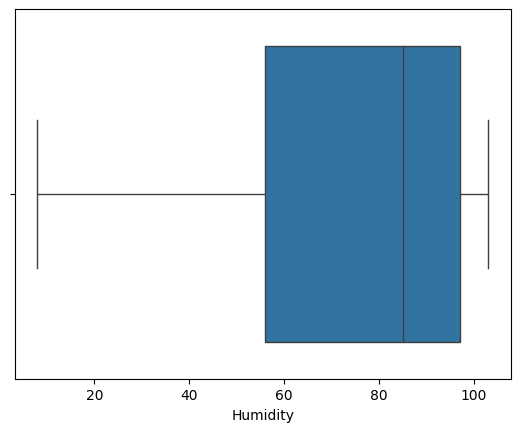

In [ ]:
sns.boxplot(x=dataset['Humidity'])


<Axes: xlabel='Pressure'>

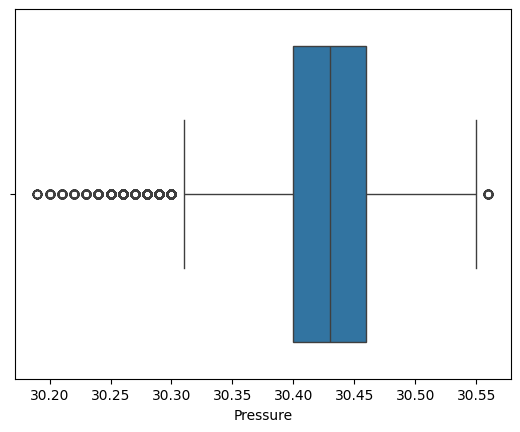

In [ ]:
sns.boxplot(x=dataset['Pressure'])

<Axes: xlabel='Radiation'>

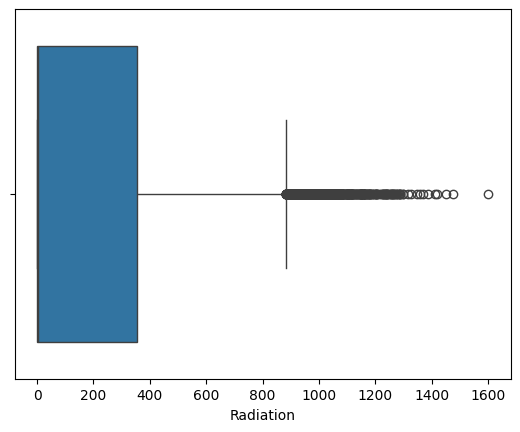

In [ ]:
sns.boxplot(x=dataset['Radiation'])

<Axes: xlabel='Temperature'>

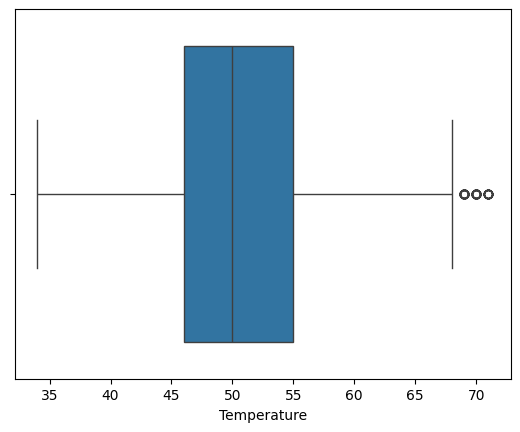

In [ ]:
sns.boxplot(x=dataset['Temperature'])

<Axes: xlabel='WindDirection(Degrees)'>

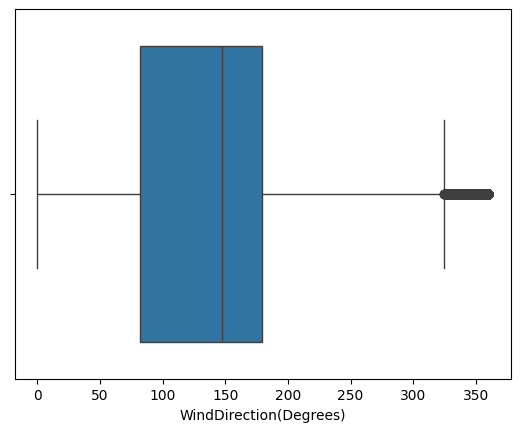

In [ ]:
sns.boxplot(x=dataset['WindDirection(Degrees)'])

In [ ]:
# Removing Outliers
x= dataset['Radiation'].quantile(0.25)
y= dataset['Radiation'].quantile(0.75)
print(x,y)

1.23 354.24


Feature Selection using Pearson coefficient

In [ ]:
# correlation between pressure and humidity
print(dataset['Pressure'].corr(dataset['Humidity']))

-0.2239633377016409


In [ ]:
dataset.isnull().count()

UNIXTime                  32685
Data                      32685
Time                      32685
Radiation                 32685
Temperature               32685
Pressure                  32685
Humidity                  32685
WindDirection(Degrees)    32685
Speed                     32685
TimeSunRise               32685
TimeSunSet                32685
dtype: int64

In [ ]:
data = dataset[["Pressure", "Humidity", "Radiation", "Temperature", "WindDirection(Degrees)", "Speed"]]

In [ ]:
data

,Pressure,Humidity,Radiation,Temperature,WindDirection(Degrees),Speed
0,30.46,58,1.21,48,176.78,3.37
1,30.46,57,1.23,48,158.75,3.37
2,30.46,60,1.21,48,137.71,3.37
3,30.46,62,1.17,48,104.95,5.62
4,30.46,64,1.21,48,120.20,5.62
...,...,...,...,...,...,...
32680,30.43,102,1.22,44,145.42,6.75
32681,30.42,102,1.17,44,117.78,6.75
32682,30.42,102,1.20,44,145.19,9.00
32683,30.42,101,1.23,44,164.19,7.87


In [ ]:
data.corr()

,Pressure,Humidity,Radiation,Temperature,WindDirection(Degrees),Speed
Pressure,1.000000,-0.223963,0.119031,0.311187,-0.229021,-0.083636
Humidity,-0.223963,1.000000,-0.226186,-0.285067,-0.001826,-0.211628
Radiation,0.119031,-0.226186,1.000000,0.734952,-0.230318,0.073624
Temperature,0.311187,-0.285067,0.734952,1.000000,-0.259417,-0.031461
WindDirection(Degrees),-0.229021,-0.001826,-0.230318,-0.259417,1.000000,0.073095
Speed,-0.083636,-0.211628,0.073624,-0.031461,0.073095,1.000000


In [ ]:
corrdata = data.corr().unstack().sort_values().drop_duplicates()
print(corrdata)

Humidity                Temperature              -0.285067
Temperature             WindDirection(Degrees)   -0.259417
Radiation               WindDirection(Degrees)   -0.230318
WindDirection(Degrees)  Pressure                 -0.229021
Humidity                Radiation                -0.226186
                        Pressure                 -0.223963
                        Speed                    -0.211628
Speed                   Pressure                 -0.083636
Temperature             Speed                    -0.031461
Humidity                WindDirection(Degrees)   -0.001826
Speed                   WindDirection(Degrees)    0.073095
Radiation               Speed                     0.073624
Pressure                Radiation                 0.119031
Temperature             Pressure                  0.311187
Radiation               Temperature               0.734952
                        Radiation                 1.000000
dtype: float64


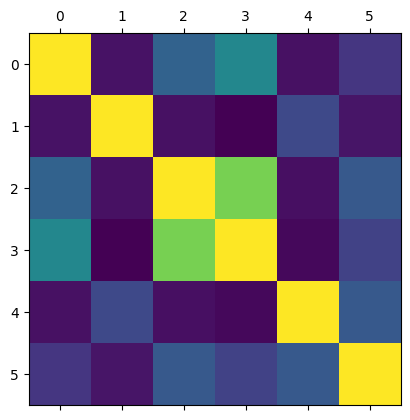

In [ ]:
plt.matshow(data.corr())
plt.show()

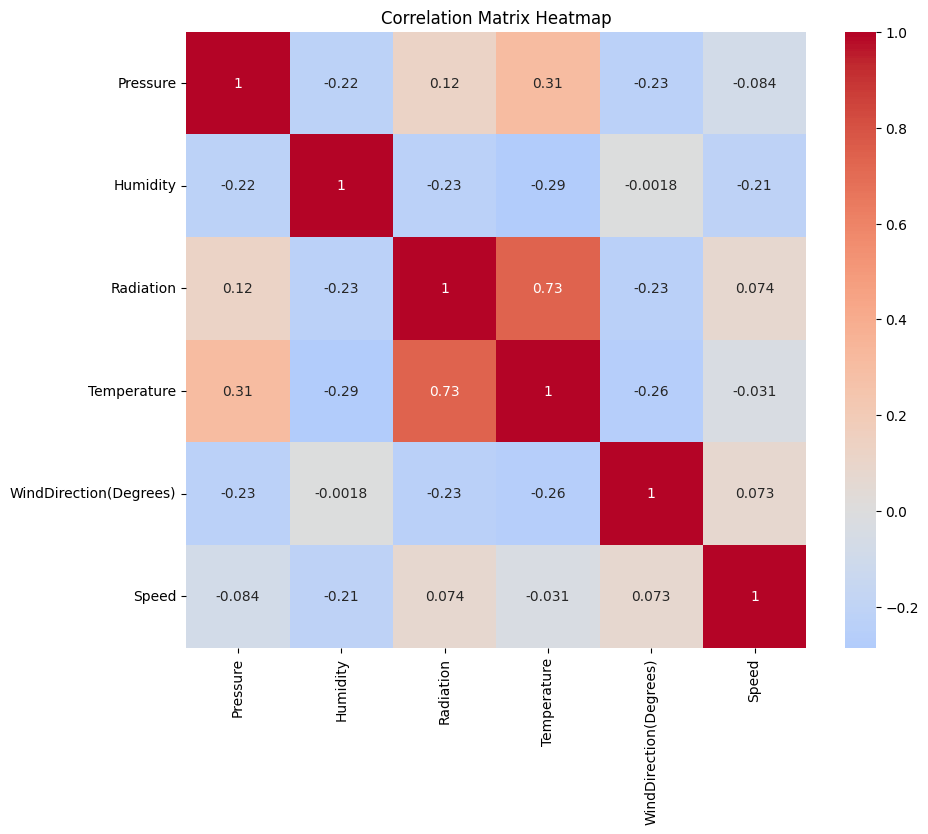

In [ ]:
corr_matrix = data.corr()

#Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

Data Splitting into Train and Test

In [ ]:
y = data.Radiation
X = data.drop(columns="Radiation", axis=1)
X, y

(       Pressure  Humidity  Temperature  WindDirection(Degrees)  Speed
 0         30.46        58           48                  176.78   3.37
 1         30.46        57           48                  158.75   3.37
 2         30.46        60           48                  137.71   3.37
 3         30.46        62           48                  104.95   5.62
 4         30.46        64           48                  120.20   5.62
 ...         ...       ...          ...                     ...    ...
 32680     30.43       102           44                  145.42   6.75
 32681     30.42       102           44                  117.78   6.75
 32682     30.42       102           44                  145.19   9.00
 32683     30.42       101           44                  164.19   7.87
 32684     30.43       101           44                   83.59   3.37
 
 [32685 rows x 5 columns],
 0        1.21
 1        1.23
 2        1.21
 3        1.17
 4        1.21
          ... 
 32680    1.22
 32681    1.17

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

In [39]:
X_train, X_test

(array([[-1.71323462,  0.50004136, -0.82659481,  1.56645393, -0.50328373],
        [-0.42738661, -0.73037722,  1.27252226, -0.14007086, -0.18415279],
        [-1.1621569 ,  0.69229426, -0.98806535,  2.00672312,  0.7789388 ],
        ...,
        [ 0.49107626,  0.38468962,  1.11105172,  2.14930482,  1.42005007],
        [ 1.77692427, -0.73037722,  2.07987498,  1.44928163, -0.50328373],
        [-0.24369404, -0.53812431, -0.66512427,  0.48360368,  0.45695848]]),
 array([[ 0.12369111, -0.61502548,  1.59546335, -1.28722738,  0.45695848],
        [-0.61107918,  0.9998989 , -0.34218318, -1.0661294 , -1.46637533],
        [-0.24369404,  0.2308873 , -0.01924209,  0.25431689, -0.50328373],
        ...,
        [ 0.30738368, -0.88417954, -0.98806535,  0.52490902, -0.82526406],
        [-0.06000146,  0.9998989 , -0.66512427, -0.78939565,  0.13782754],
        [ 0.12369111,  0.96144832, -0.18071264, -0.28060536, -0.50328373]]))

Data Scaling and Normalization.

In [38]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Model Training

In [40]:
#Linear Regression model training
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.5744366801652396


In [41]:
print(X_test.shape)
print(y_test.shape)

(6537, 5)
(6537,)


Predicting on test Dataset.

In [42]:
y_pred = regr.predict(X_test)


Performance Metric

In [43]:
r2_score(y_test, y_pred)

0.5744366801652396

Random Forest Model

In [44]:
regr_random = RandomForestRegressor(max_depth=2, random_state=0)
regr_random.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [45]:
y_pred = regr_random.predict(X_test)

In [46]:
r2_score(y_test, y_pred)

0.6109141754321281

In [ ]:
regr_random.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Testing on New Data

In [55]:
X_test[0].reshape(1,-1)



array([[ 0.12369111, -0.61502548,  1.59546335, -1.28722738,  0.45695848]])

In [56]:
scaler.transform(X_test[0].reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-556.58069609,   -2.90725781,   -7.99661949,   -1.74191403,
          -1.65530128]])

In [58]:
regr_random.predict(scaler.transform(X_test[0].reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([47.12041462])

Hyper Parameter Tuning - Optional

In [ ]:
parameters ={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
     'criterion' : ['gini', 'entropy', 'squared_error'],
     'max_features': [0.3,0.5,0.7,0.9],
     'min_samples_leaf': [3,5,7,10,15],
     'min_samples_split': [2,5,10],
     'n_estimators': [50,100,200,400,600]}

param_size = ParameterGrid(parameters)
len(param_size)

9000

In [ ]:

# grid_search = RandomForestRegressor()
# grid_search = GridSearchCV(
#     grid_search,
#     parameters,
#     cv=5,
#     scoring='accuracy',n_jobs=-1)

# grid_result= grid_search.fit(X_train, y_train)
# print('Best Params: ', grid_result.best_params_)
# print('Best Score: ', grid_result.best_score_)

Pickling The Model file For Deployment

In [60]:
pickle.dump(regr_random,open('regmodel.pkl','wb'))

In [61]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [62]:
## Prediction
pickled_model.predict(scaler.transform(X_test[0].reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([47.12041462])